In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/train.csv')

### Dropping outliers using standard deviation

In [3]:
factor = 2
upper_lim = data['battery_power'].mean() + data['battery_power'].std() * factor
lower_lim = data['battery_power'].mean() - data['battery_power'].std() * factor

In [4]:
data = data[(data['battery_power'] > lower_lim) & (data['battery_power'] < upper_lim)]

print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


### Dropping outliers using percentiles

In [5]:
upper_lim = data['battery_power'].quantile(.99)
lower_lim = data['battery_power'].quantile(.01)

In [6]:
data = data[(data['battery_power'] > lower_lim) & (data['battery_power'] < upper_lim)]

print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1994            858     0          2.2         0   1       0          50
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46

[1957 rows x 7 columns]


### Dropping outliers by capping values

In [7]:
#By using the upper and lower lim of the percentile above

data.loc[(data['battery_power'] > upper_lim), 'battery_power'] = upper_lim
data.loc[(data['battery_power'] < lower_lim), 'battery_power'] = lower_lim

print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0             842.0     0          2.2         0   1       0           7
1            1021.0     1          0.5         1   0       1          53
2             563.0     1          0.5         1   2       1          41
3             615.0     1          2.5         0   0       0          10
4            1821.0     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1994          858.0     0          2.2         0   1       0          50
1995          794.0     1          0.5         1   0       1           2
1996         1965.0     1          2.6         1   0       0          39
1997         1911.0     0          0.9         1   1       1          36
1998         1512.0     0          0.9         0   4       1          46

[1957 rows x 7 columns]


### One-hot encoding

In [8]:
data = pd.read_csv('data/dataset.csv')

In [9]:
encoded_columns = pd.get_dummies(data['color'])

data = data.join(encoded_columns).drop('color', axis = 1)

print(data)

    index  black  green  purple  red   white  yellow
0       0      0      1       0     0      0       0
1       1      0      0       0     0      0       1
2       2      0      0       0     0      0       0
3       3      0      0       0     1      0       0
4       4      0      0       1     0      0       0
5       5      0      0       0     1      0       0
6       6      0      0       0     1      0       0
7       7      0      0       1     0      0       0
8       8      0      0       0     0      0       0
9       9      0      0       0     1      0       0
10     10      0      0       0     0      0       1
11     11      0      0       0     0      0       0
12     12      1      0       0     0      0       0
13     13      0      0       0     0      1       0


### Log transform

In [10]:
data = pd.DataFrame({'value': [3.67, -17, 44, 37, 3, 31, -38]})

data['log+1'] = (data['value'] + 1).transform(np.log)

#Handling negative values
data['log'] = (data['value'] - data['value'].min() + 1).transform(np.log)

print(data)

   value     log+1       log
0   3.67  1.541159  3.753496
1 -17.00       NaN  3.091042
2  44.00  3.806662  4.418841
3  37.00  3.637586  4.330733
4   3.00  1.386294  3.737670
5  31.00  3.465736  4.248495
6 -38.00       NaN  0.000000


### Normalization

In [11]:
data = pd.DataFrame({'value': [7,25, -47, 73, 8, 22, 53, -25]})

data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())

print(data)

   value  normalized
0      7    0.450000
1     25    0.600000
2    -47    0.000000
3     73    1.000000
4      8    0.458333
5     22    0.575000
6     53    0.833333
7    -25    0.183333


### Standardization

In [12]:
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()

print(data)

   value  normalized  standardized
0      7    0.450000     -0.193539
1     25    0.600000      0.270954
2    -47    0.000000     -1.587017
3     73    1.000000      1.509601
4      8    0.458333     -0.167733
5     22    0.575000      0.193539
6     53    0.833333      0.993498
7    -25    0.183333     -1.019303


### Preprocessing data

In [13]:
from sklearn import preprocessing

input_data = np.array([[5.1, -2.9, 3.3], [-1.2, 7.8, -6.1], [3.9, 0.4, 2.1], [7.3, -9.9, -4.5]])

In [14]:
#Binarization

binarized_data = preprocessing.Binarizer(threshold = 2.1).transform(input_data)

print('Binarized data', binarized_data)

Binarized data [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [15]:
#Mean removal

print(f'Before\nMean = {input_data.mean(axis = 0)}\nStd deviation = {input_data.std(axis = 0)}\n')

scaled_data = preprocessing.scale(input_data)
print(f'After\nMean = {scaled_data.mean(axis = 0)}\nStd deviation = {scaled_data.std(axis = 0)}')

Before
Mean = [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]

After
Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]


In [16]:
#Min-max scaling

minmax_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaled_minmax_data = minmax_scaler.fit_transform(input_data)

print('Min-max scaled data:\n', scaled_minmax_data)

Min-max scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]


In [17]:
#Normalization

l1_normalized_data = preprocessing.normalize(input_data, norm = 'l1')
l2_normalized_data = preprocessing.normalize(input_data, norm = 'l2')

print(f'L1 normalized data:\n{l1_normalized_data}\n')
print(f'L2 normalized data:\n{l2_normalized_data}')

L1 normalized data:
[[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]

L2 normalized data:
[[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


In [18]:
#Label Encoding

input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

LabelEncoder()

In [19]:
print('Label mapping\n')

for i, item in enumerate(encoder.classes_):
    print(f'{item} --> {i}')

Label mapping

black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


In [20]:
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)

print(f'Labels = {test_labels}\n')
print(f'Encoded values = {list(encoded_values)}')

Labels = ['green', 'red', 'black']

Encoded values = [1, 2, 0]


In [21]:
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)

print(f'Encoded values = {encoded_values}\n')
print(f'Decoded values = {list(decoded_list)}')

Encoded values = [3, 0, 4, 1]

Decoded values = ['white', 'black', 'yellow', 'green']


### Logistic Regression Classifiers

In [22]:
from sklearn import linear_model
import matplotlib.pyplot as plt

from data.utilities import visualize_classifier

In [23]:
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], 
              [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

C:\Users\U\Artificial Intelligence\data\utilities.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_vals, y_vals, output, cmap = plt.cm.gray)


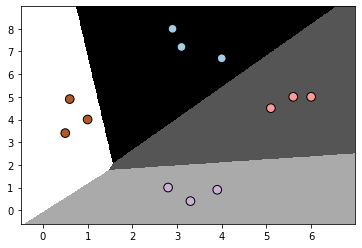

In [24]:
classifier = linear_model.LogisticRegression(solver = 'liblinear', C = 1)

classifier.fit(X, y)

visualize_classifier(classifier, X, y)

C:\Users\U\Artificial Intelligence\data\utilities.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_vals, y_vals, output, cmap = plt.cm.gray)


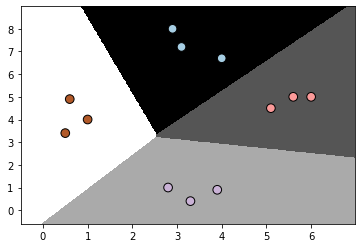

In [25]:
classifier = linear_model.LogisticRegression(solver = 'liblinear', C = 100)

classifier.fit(X, y)

visualize_classifier(classifier, X, y)

### Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

In [27]:
input_file = 'data/data_multivar_nb.txt'

data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data[:, -1]

In [28]:
classifier = GaussianNB()

classifier.fit(X, y)

GaussianNB()

Accuracy of Naive Bayes Classifier = 99.75%


C:\Users\U\Artificial Intelligence\data\utilities.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_vals, y_vals, output, cmap = plt.cm.gray)


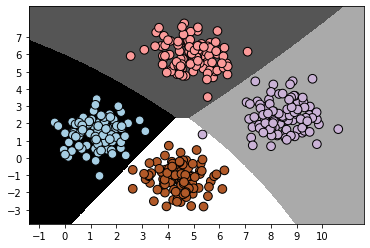

In [29]:
y_pred = classifier.predict(X)

accuracy = 100 * (y == y_pred).sum() / X.shape[0]

print(f'Accuracy of Naive Bayes Classifier = {round(accuracy, 2)}%')

visualize_classifier(classifier, X, y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

new_classifier = GaussianNB()
new_classifier.fit(X_train, y_train)

y_test_pred = new_classifier.predict(X_test)

Accuracy of the new classifier = 100.0%


C:\Users\U\Artificial Intelligence\data\utilities.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_vals, y_vals, output, cmap = plt.cm.gray)


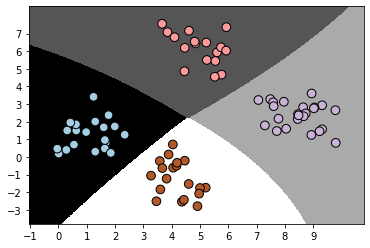

In [31]:
accuracy = 100 * (y_test == y_test_pred).sum() / X_test.shape[0]
print(f'Accuracy of the new classifier = {round(accuracy, 2)}%')

visualize_classifier(new_classifier, X_test, y_test)

In [32]:
#Calculating accuracy, precision and recall values using 3-fold cross validation

num_folds = 3

accuracy_values = cross_val_score(classifier, X, y, scoring = 'accuracy', cv = num_folds)
print(f'Accuracy: {round(100 * accuracy_values.mean(), 2)}%')

precision_values = cross_val_score(classifier, X, y, scoring = 'precision_weighted', cv = num_folds)
print(f'Precision: {round(100 * precision_values.mean(), 2)}%')

recall_values = cross_val_score(classifier, X, y, scoring = 'recall_weighted', cv = num_folds)
print(f'Recall: {round(100 * recall_values.mean(), 2)}%')

f1_values = cross_val_score(classifier, X, y, scoring = 'f1_weighted', cv = num_folds)
print(f'F1: {round(100 * f1_values.mean(), 2)}%')

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


### Confusion matrixes

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

# Define sample labels
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

In [34]:
confusion_mat = confusion_matrix(true_labels, pred_labels)

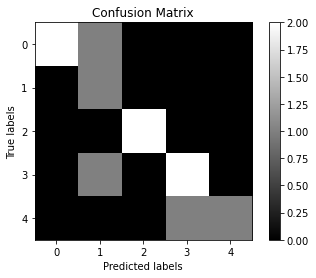

In [37]:
#Visualize the confusion matrix
plt.imshow(confusion_mat, interpolation = 'nearest', cmap = plt.cm.gray)
plt.title('Confusion Matrix')
plt.colorbar()

ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)

plt.ylabel('True labels')
plt.xlabel('Predicted labels');

In [38]:
#Classification report

targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print(classification_report(true_labels, pred_labels, target_names = targets))

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11

